# Cos'è scikit-learn?

Scikit-learn (acronimo costruito a partire dalle parole **sci**entific tool**kit**) è uno dei package Python più famosi per la realizzazione di script basati su algoritmi di machine learning. Le principali ragioni legate alla sua diffisione sono nella sua elevata compatibilità con NumPy e Pandas, e alla sua facilità d'uso.

Sebbene scikit-learn metta a disposizione differenti algoritmi di machine learning, in questa lezione ci focalizzeremo solo sulle Reti Neurali Artificiali FeedForward e sugli strumenti messi a disposizione per valutarne le prestazioni.

Scikit-learn non ha prerequisiti, se non Python stesso. Tutti i laboratori presenti nel corso avranno già una versione di Scikit-learn installata. La guida ufficiale completa è reperibile sul [sito ufficiale](https://scikit-learn.org/stable/). Si noti inoltre che le funzionalità e la sintassi dei comandi possono variare tra le varie release. Questo documento fa riferimento alla versione `0.22.2`.

# Come usare scikit-learn

In [1]:
import sklearn          #sklearn è il namespace usato da scikit-learn
sklearn.__version__     

'0.22.2.post1'

Noterete che, a differenza di quanto fatto nelle altre lezioni, questa volta non associamo nessun alias all'import di scikit-learn. La motivazione risiede nel fatto che il namespace base funge da contenitore per tutti i metodi necessari, raggruppati per funzionalità.

# Importare e manipolare i dati

Come detto all'inizio della lezione, scikit-learn è pensato per operare con NumPy e Pandas. Nel caso delle reti neurali artificiali feed-forward, probabilmente il modo più intuitivo per importare i dati è tramite l'uso dei Dataframe di Pandas. Difatti, la struttura tabellare ben si presta allo scopo, con le righe utilizzate per memorizzare le diverse istanze e le colonne le diverse features.


In [2]:
import pandas as pd

#Url del file csv da caricare
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"    #"UC Irvine Machine Learning Repository" è una famosa collezione di dataset pubblici per il machine learning

#Lettura del dataset
irisPandas = pd.read_csv(url, names=['Lunghezza Sepalo', 'Larghezza Sepalo', 'Lunghezza Petalo', 'Larghezza Petalo', 'Specie'])
irisPandas.head()

,Lunghezza Sepalo,Larghezza Sepalo,Lunghezza Petalo,Larghezza Petalo,Specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nell'esempio abbiamo caricato un dataset in formato `.csv` scaricandolo direttamente da una repository internet. 

Tuttavia, scikit-learn prevede una serie di dataset già pronti all'uso, facilmente importabili dal namespace `sklearn.datasets`

In [3]:
from sklearn.datasets import load_iris

irisScikit = load_iris()   
print(irisScikit.keys())

print(irisScikit.data)
print(irisScikit['target'])
print(irisScikit.feature_names)
print(irisScikit.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.

In questo caso, il metodo `load_iris()` restituisce un oggetto di `tipo sklearn.utilis.bunch`, un contenitore i cui elementi sono accessibili sia tramite dot notation sia tramite riferimento esplicito (con `['nome campo']`). L'elenco dei campi disponibili si può ottenere tramite il metodo `keys()`.

Esistono anche altri modi per importare i dati, come ad esempi usare NDarrays o il package [seaborn](https://seaborn.pydata.org/). 


## Manipolazione dei dati

Tra i numerosi modelli di machine learning disponibili, in questa lezione ci focalizzeremo sulle Reti Neurali Artificiali (ANN, dall'inglese Artificial Neural Networks) di tipo feedforward. 

Le ANN sono molto versatili. Tuttavia, il loro corretto funzionamento richiede che i dati siano in una "forma" adatta. Per questo motivo, è spesso necessario manipolare i dati prima di procedere con l'addestramento di una ANN.


### Trasformare la classe

Avrete notato che una delle differenze esistenti tra il dataset caricato con Pandas (`irisPandas`) e quello caricato usando le funzionalità di scikit-learn (`irisScikit`) è che il primo presenta le classi in forma "enumerativa" (o categorica), mentre il secondo in forma numerica, formato che meglio si presta all'uso con ANN.

Dato che, tranne per scopi didattici, la maggior parte delle volte i dati sono caricati usando packages esterni (come Pandas), scikit-learn mette a disposizione delle funzionalità per la conversione dei valori della colonna associata alla classe. 

In [4]:
from sklearn import preprocessing
labEnc = preprocessing.LabelEncoder()

irisPandasTrasformato = irisPandas.apply(labEnc.fit_transform)

#Visualizzazione delle classi presenti prima e dopo la trasformazione
print(irisPandas.Specie.unique())
print(irisPandasTrasformato.Specie.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


Dopo l'uso dell'encoder, le tre classi categoriche sono state trasformate in altrettanti valori numerici. Si noti che il *label encoder* è solo uno dei vari modi in cui è possibile trasformare la colonna della classe. 

### Divisione in Train, Validation, Test

Gli algoritmi appartenenti alla famiglia dell'*apprendimento supervisionato* prevedono l'uso di dati su cui addestrare i modelli di classificazione e regressione. Dato che quello a cui si è interessati è generare modelli che si comportino bene su dati reali (e non sui dati di usati per l'addestramento) è buona norma dividere il dataset di partenza in tre gruppi:

*   **Training Set**, usato per addestrare il modello
*   **Validation Set**, usato per il tuning dei parametri del modello
*   **Test Set**, usato per calcolare una stima dell'*errore di generalizzazione*

Scikit-learn mette a disposizione dei metodi per eseguire questa divisione all'interno del namespace `model_selection`. Supponendo di voler dividere il dataset iniziale in tre sotto dataset, con proporzioni rispettivamenete del 60%, 20% e 20%, è possibile procedere come segue

In [5]:
from sklearn.model_selection import train_test_split

dati = irisPandasTrasformato.drop('Specie',axis=1)
classi = irisPandasTrasformato['Specie']

dataTrain, dataTest, classiTrain, classiTest = train_test_split(dati, classi, test_size = 0.20)
dataTrain, dataValidation, classiTrain, classiValidation = train_test_split(dataTrain, classiTrain, test_size = 0.25)

La procedura mostrata prende il nome di hold-out. Si noti che il metodo `train_test_split` permette la divisione solo in due parti (la prima nota come train e la seconda come test), e accetta come parametro la dimensione percentuale che dovrà avere il secondo dataset. Dato che noi vogliamo una divisione in tre porzioni, dobbiamo ripetere l'operazione sul primo dataset, ottenendo cosi anche il validation set. In particolare, dato che il dataset usato come input in questa seconda operazione contiene l'80% dei campioni del dataset di partenza, volendo noi ottenere un validation avente il 20% dei campioni originali, dobbiamo usare come valore di split 0.25 (infatti 80% * 0.25 = 20%). 

Una tecnica più avanzata è la cross-validation. Anche in questo caso, scikit-learn mette a disposizione delle funzionalità per lo scopo.

### Scaling delle features

Il processo di apprendimento delle ANN si basa sul calcolo dei gradienti e sul loro uso per la modifica dei pesi dei neuroni. Il calcolo dei gradienti è influenzato dal range di valori nei quali ogni feature è rappresentato. Per tale ragione, è opportuno effettuare una normalizzazione o uno scaling dei dati prima di procedere all'addestramento.

I metodi messi a disposizione a tal scopo da scikit-learn sono contenuti nel namespace `preprocessing`

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataTrain)

dataTrainScalato = scaler.transform(dataTrain)
dataTestScalato = scaler.transform(dataTest)
dataValidationScalato = scaler.transform(dataValidation)

Lo scaler utilizzato deve calcolare i valori di riferimento (media e varianza nel caso dello StandardScaler) con cui effettuare la trasformazione. Come detto in precedenza, quello che si desidera è avere un modello che si comporti bene sui dati reali (qui rappresentati dal dataset di test). Per tale ragione, è importante calcolare tali valori **SOLO** sul dataset di train (con la funzione `fit`) per poi applicarli (tramite la funzione `transform`) su tutti e tre i datasets.

In [7]:
#TASK: Visualizza i valori scalati in questo modo e quelli che otterresti effettuando
# il fit dello scaler sull'intero dataset (la variabile dati) e non solo sulla porzione di training. 
#Che differenze ci sono? Perchè?


## Definizione e addestramento di una ANN

Il modello più noto e utilizzato di ANN di tipo feedforward è il MultiLayer Perceptron (MLP). Anche scikit-learn usa questo acronimo, all'interno del namespace `neural_network`

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=100)
mlp.fit(dataTrainScalato, classiTrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Analizziamo nel dettaglio le due funzioni utilizzate. 

`MLPClassifier` è il metodo che permette l'inizializzazione di un MLP a fini di classificazione. Prevede differenti opzioni (si rimanda alla documentazione ufficiale per maggiori dettagli), tra cui le due più importanti sono riportate nell'esempio:

*   `hidden_layer_sizes` definisce il numero di livelli nello strato nascosto (hidden layers) e il numero di neuroni per ognuno di essi. Si noti che l'unica informazione esplicitamente dichiarata è il numero di neuroni per ogni livello (un array di due elementi nell'esempio, con 3 per il primo livello e 4 per il secondo). Il numero di livelli nascosti è implicitamente determinato dal numero di elementi di tale vettore (due nell'esempio)
*   `max_iter` definisce il numero di epoche. Si noti che in questo caso viene impropriamente usato il termine *iter* (per iterazioni) per indicare un'epoca

`fit` è il metodo che avvia l'addestramento vero e proprio. 

Si noti come l'output di tale operazione è la lista di tutti i parametri usati per l'addestramento.



### Valutazione delle performance

A termine delle istruzioni precedenti, la variabile `mlp` contiene una ANN (con le caratteristiche definite precedentemente) addestrata sui dati contenuti nell'array `dataTrainScalato`. A questo punto, è possibile usare il metodo `predict` per ottenere l'output generato dal modello addestrato su dati mai visti (come ad esempio il test set se si vuole valutare l'errore di generalizzazione o dati nuovi quando il modello sarà rilasciato per funzionare nel mondo reale). 

Per valutare le performance ottenute, scikit-learn prevede numerose possibilità, tutte raggruppate nel package `metrics`. Per avere una rapida panoramica delle performance, è possibile usare i metodi `confusion_matrix` e `classification_report`.

In [9]:
predictions = mlp.predict(dataTestScalato)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(classiTest,predictions))
print(classification_report(classiTest,predictions))

[[ 0  4  8]
 [ 0 10  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.71      0.91      0.80        11
           2       0.44      1.00      0.61         7

    accuracy                           0.57        30
   macro avg       0.38      0.64      0.47        30
weighted avg       0.36      0.57      0.44        30



In [10]:
#TASK: Che succede se addestriamo la rete su dati non normalizzati? Che performance abbiamo?


### Tuning dei parametri

Le performance ottenute nell'esercizio precedente non sono particolarmente entusiasmanti. Per migliorarle, è possibile agire sul numero di livelli hidden, sul numero di neuroni al loro interno, sul massimo numero di epoche (iterazioni) e sugli altri parametri disponibili per `MLPClassifier`, valutando come queste modifiche impattino sulle performance.

Questa procedura è detta ottimizzazione dei parametri. Dalla teoria sappiamo però che questa operazione NON deve essere effettuata utilizzando i dati del test set. Infatti, quest'ultimo deve non deve essere usato per addestrare (nè esplicitamente nè implicitamente) il classificatore, se si vuole avere una stima realistica dell'errore di generalizzazione. 

Ed è a questo punto che entra in gioco il validation set, finora inutilizzato. Il procedimento è quindi il seguente: 

*   Si sceglie una serie di valori per i parametri che si vogliono modificare, appuntandoli (ad esempio in una tabella)
*   Si esegue l'addestramento sul training set
*   Si valutano le performance sul validation set, appuntando i risultati ottenuti a margine del set di parametri usati

Il procedimento è ripetuto in maniera iterativa fino a quando non si determina un *buon* set di parametri (ossia che permetta di avere performance soddisfacenti sul validation set). Solo a questo punto, il miglior modello ottenuto viene usato per valutare le performance sul test set: se l'errore di generalizzazione cosi ottenuto è "simile" a quello che si commetteva sul validation set, c'è la ragionevole sicurezza che il modello si comporterà in maniera simile anche su nuovi dati, mai visti.


In [11]:
#Addestramento sul training set, con parametri differenti
mlp = MLPClassifier(hidden_layer_sizes=(1,2), max_iter=150)
mlp.fit(dataTrainScalato, classiTrain)

#Valutazione delle performance sul validation 
predictionsValidation = mlp.predict(dataValidationScalato)
print(confusion_matrix(classiValidation,predictionsValidation))
print(classification_report(classiValidation,predictionsValidation))

####################################################################################
#                                                                                  #
# Le righe di cui sopra vanno iterate fino a quando si è soddisfatti dei risultati #
#                                                                                  #
####################################################################################

#Valutazione dell'errore di generalizzazione
predictionsTest = mlp.predict(dataTestScalato)
print(confusion_matrix(classiTest,predictionsTest))
print(classification_report(classiTest,predictionsTest))

[[ 9  1  0]
 [ 2  7  0]
 [ 1 10  0]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.39      0.78      0.52         9
           2       0.00      0.00      0.00        11

    accuracy                           0.53        30
   macro avg       0.38      0.56      0.45        30
weighted avg       0.37      0.53      0.43        30

[[12  0  0]
 [ 2  9  0]
 [ 2  5  0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.64      0.82      0.72        11
           2       0.00      0.00      0.00         7

    accuracy                           0.70        30
   macro avg       0.46      0.61      0.53        30
weighted avg       0.54      0.70      0.61        30



Settare il numero di epoche di addestramento richiede la valutazione delle performance del modello per differenti valori del parametro `max_iter`. Scikit-learn mette a disposizione un metodo per automatizzare questa procedura iterativa tramite il metodo `validation_curve` del package `model_selection`

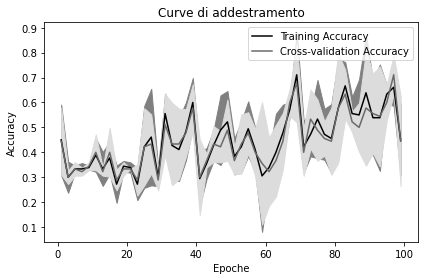

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

#Range nel quale si vuole far variare il parametro
epochRange = np.arange(1, 100, 2)

#Addestramento e test sul validation set (calcolato automaticamente) per ognuno dei valori in epochRange
trainScores, validationScores = validation_curve(MLPClassifier(hidden_layer_sizes=(5,5)), 
                                             dataTrainScalato, 
                                             classiTrain, 
                                             param_name="max_iter", 
                                             param_range=epochRange,
                                             cv=3,                      #Numero di cross-validation da effettuare
                                             scoring="accuracy", 
                                             n_jobs=-1)

#Calcolo della media e della varianza dei risultati sul training set
trainMean = np.mean(trainScores, axis=1)
trainStd = np.std(trainScores, axis=1)

#Calcolo della media e della varianza dei risultati sul validation set
valMean = np.mean(validationScores, axis=1)
valStd = np.std(validationScores, axis=1)

#Visualizzazione delle accuracy medie
plt.plot(epochRange, trainMean, label="Training Accuracy", color="black")
plt.plot(epochRange, valMean, label="Cross-validation Accuracy", color="dimgrey")

#Visualizzazione degli intervalli di variazione
plt.fill_between(epochRange, trainMean - trainStd, trainMean + trainStd, color="gray")
plt.fill_between(epochRange, valMean - valStd, valMean + valStd, color="gainsboro")

plt.title("Curve di addestramento")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Si noti che `validation_curve` effettua automaticamente lo split del dataset in ingresso in training e validation. Quindi, se si intende usare `validation_curve` per il tuning dei parametri, non è necessario effettuare esplicitamente lo split in training, validation e test set, ma sarà sufficiente dividere solamente in training e test set.

In [13]:
#TASK: eseguire la procedura riportata fino ad ottenere performance migliori


# Esercizio

Si utlizzino i concetti appresi per addestrare una ANN al riconoscimento di cifre scritte a mano. Il dataset da utilizzarsi è MNIST (Modified National Institute of Standards and Technology), scaricabile dal [sito ufficiale](http://yann.lecun.com/exdb/mnist/) o importabile da scikit-learn tramite il metodo `load_digits` del package `datasets`.

Si noti che, a differenza di quanto visto negli esercizi, in questo caso il dataset non è già rappresentato sottoforma di features (dato che ogni campione è una matrice di pixel). Si usi il valore stesso dei pixel come feature vector, linearizzando l'immagine.

Si visualizzino anche alcuni campioni del dataset tramite l'uso di Matplotlib.

# Soluzione Esercizio

(1797, 8, 8)
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 40  2  0  1  0  0  0  1  0]
 [ 0  1 34  1  0  0  0  0  0  1]
 [ 1  0  0 30  0  0  1  0  2  2]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  1  3 35  0  0  0  0]
 [ 0  1  0  0  0  0 31  0  0  0]
 [ 0  0  0  1  0  0  0 21  0  0]
 [ 0  1  0  0  1  0  0  0 32  4]
 [ 0  0  2  0  0  0  0  1  1 33]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.91      0.91      0.91        44
           2       0.89      0.92      0.91        37
           3       0.91      0.83      0.87        36
           4       0.87      0.97      0.92        40
           5       1.00      0.90      0.95        39
           6       0.94      0.97      0.95        32
           7       0.95      0.95      0.95        22
           8       0.89      0.84      0.86        38
           9       0.82      0.89      0.86        37

    accuracy                           0.91       360
   mac

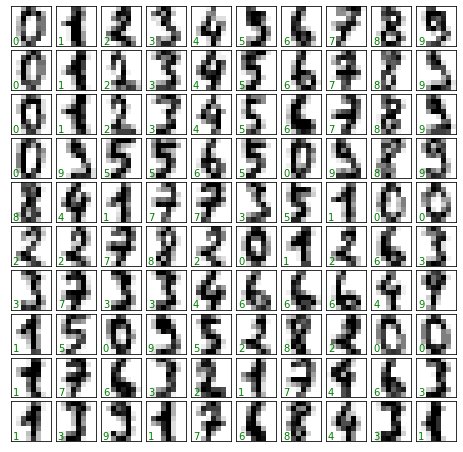

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

#Caricamento dei dati
digits = load_digits()
print(digits.images.shape)

#Visualizzazione di alcuni campioni
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

#Preparazione del dataset
dati = digits.data           
classi = digits.target

dataTrain, dataTest, classiTrain, classiTest = train_test_split(dati, classi, test_size = 0.20)
dataTrain, dataValidation, classiTrain, classiValidation = train_test_split(dataTrain, classiTrain, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(dataTrain)

dataTrainScalato = scaler.transform(dataTrain)
dataTestScalato = scaler.transform(dataTest)
dataValidationScalato = scaler.transform(dataValidation)

#Addestramento e tuning dei parametri
mlp = MLPClassifier(hidden_layer_sizes=(10,50,10), max_iter=1500)
mlp.fit(dataTrainScalato, classiTrain)

#Valutazione delle performance sul validation 
predictionsValidation = mlp.predict(dataValidationScalato)
print(confusion_matrix(classiValidation,predictionsValidation))
print(classification_report(classiValidation,predictionsValidation))

#Valutazione dell'errore di generalizzazione
predictionsTest = mlp.predict(dataTestScalato)
print(confusion_matrix(classiTest,predictionsTest))
print(classification_report(classiTest,predictionsTest))